In [23]:
import pandas as pd

df_votes = pd.read_csv('spiders_votes.csv')

df_smartvote = pd.read_csv('spiders_smartvote.csv')

df_smartvote = df_smartvote[df_smartvote[['first_name', 'last_name']].apply(tuple, axis=1).isin(df_votes[['first_name', 'last_name']].apply(tuple, axis=1))]

df_smartvote['id'] = df_smartvote.apply(
    lambda x: df_votes.loc[
        (df_votes['first_name'] == x['first_name']) & (df_votes['last_name'] == x['last_name']), 'id'
    ].values[0],
    axis=1
)

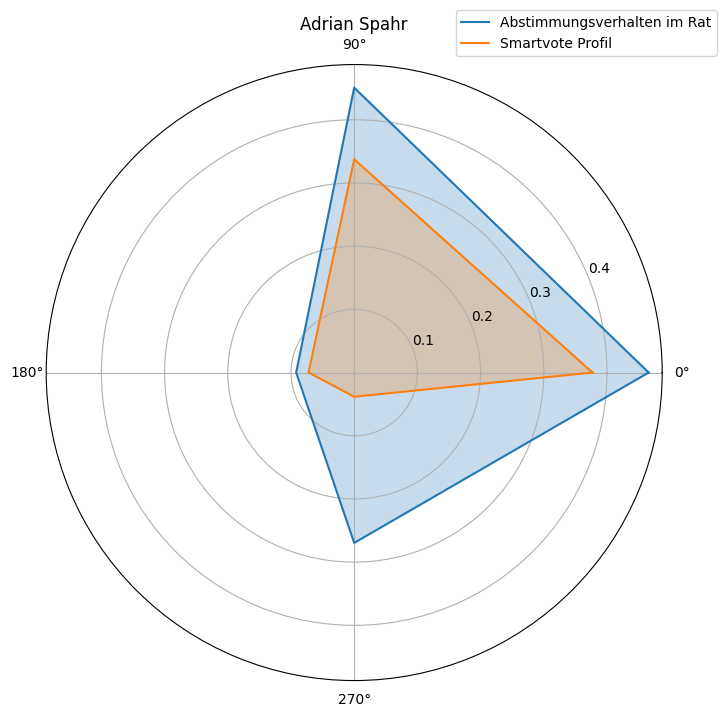

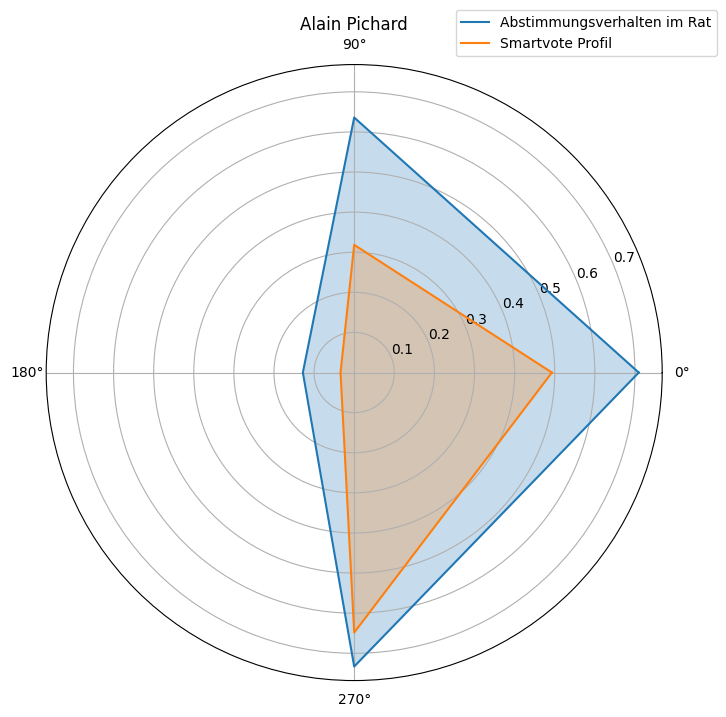

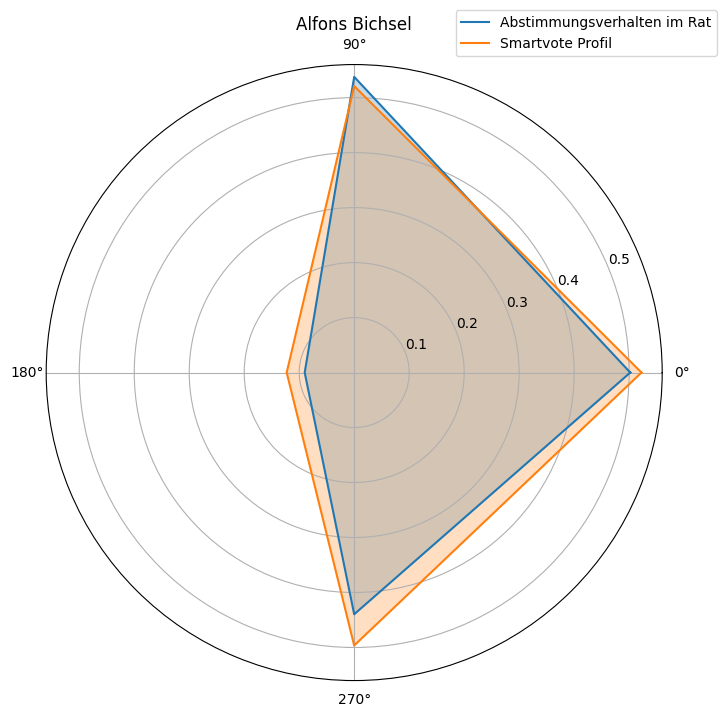

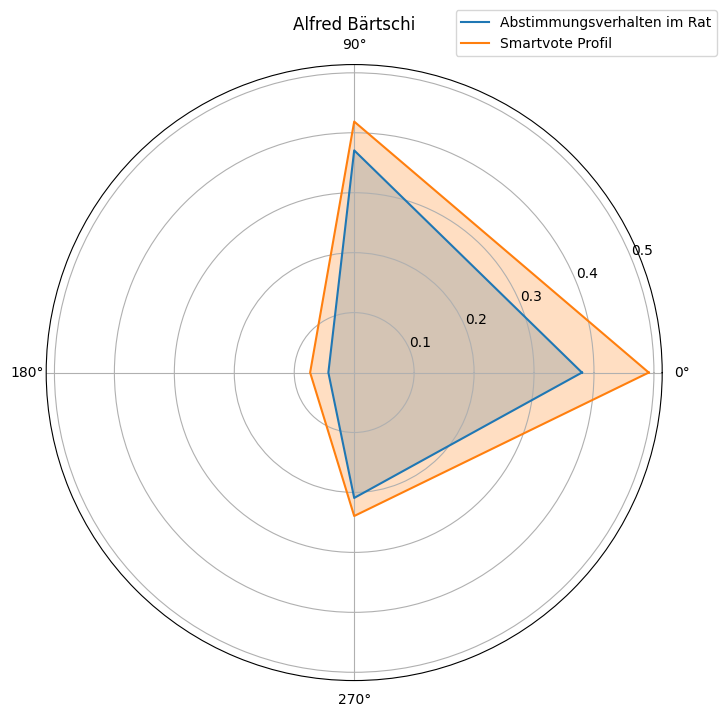

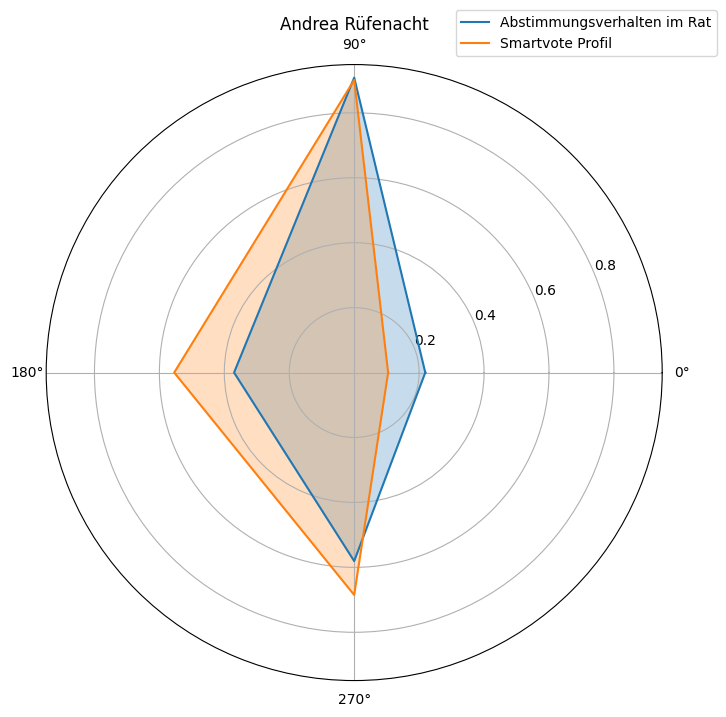

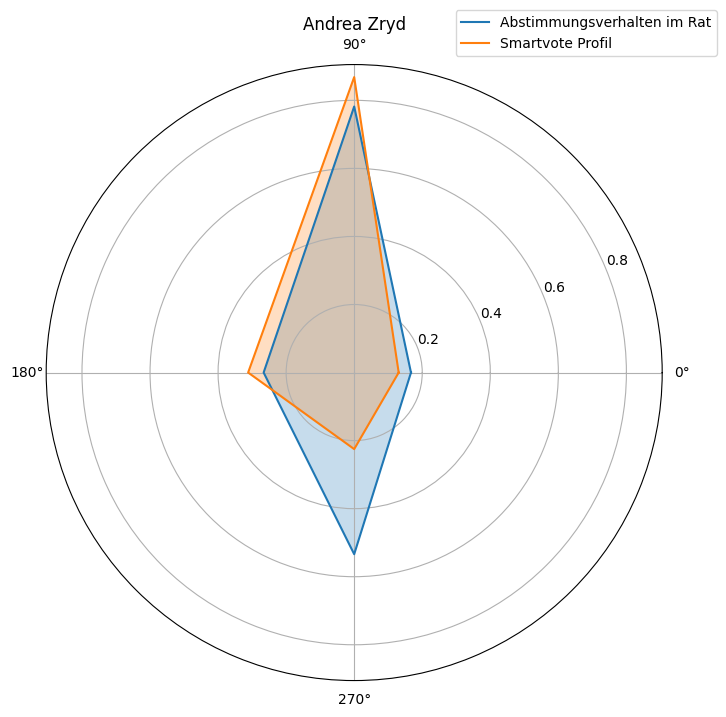

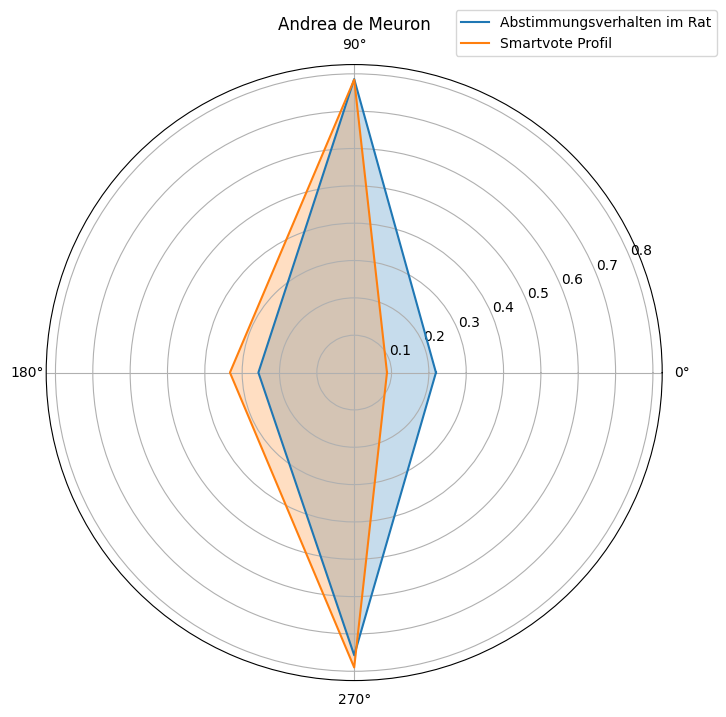

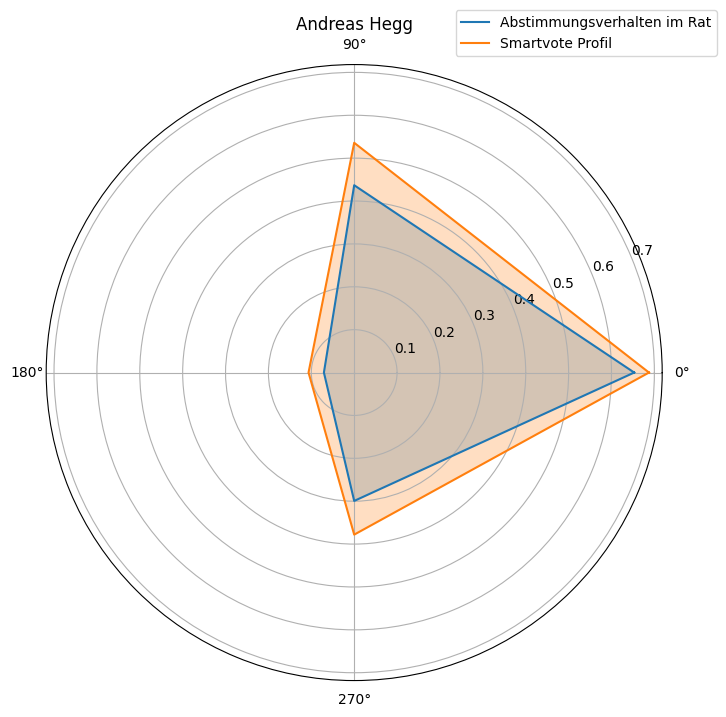

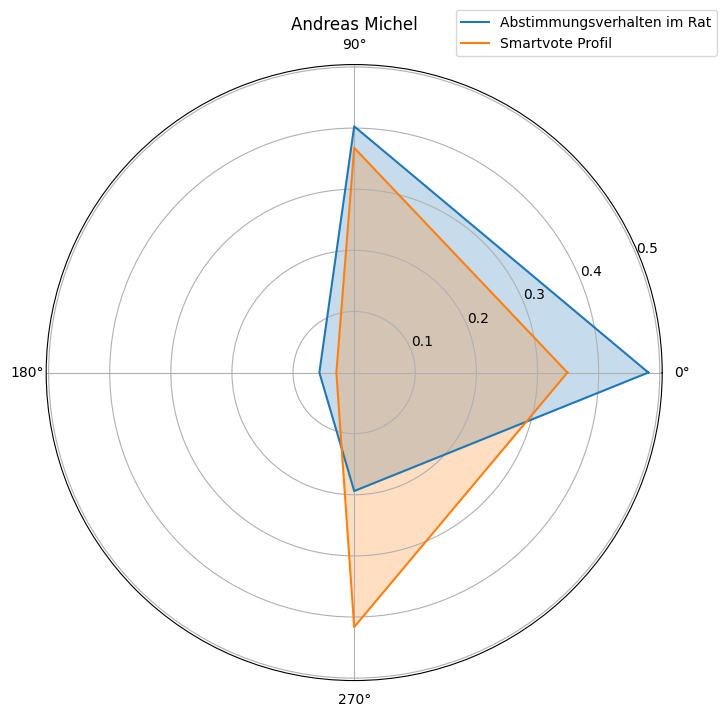

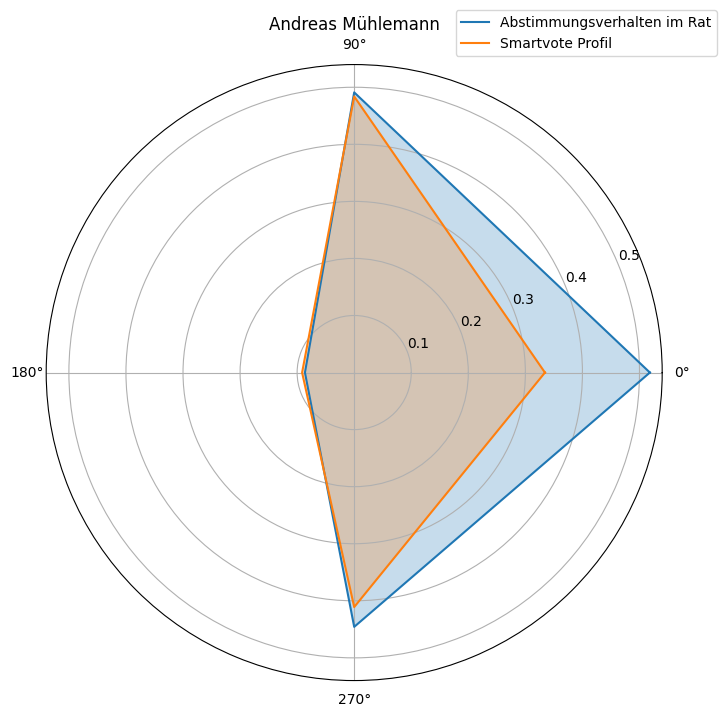

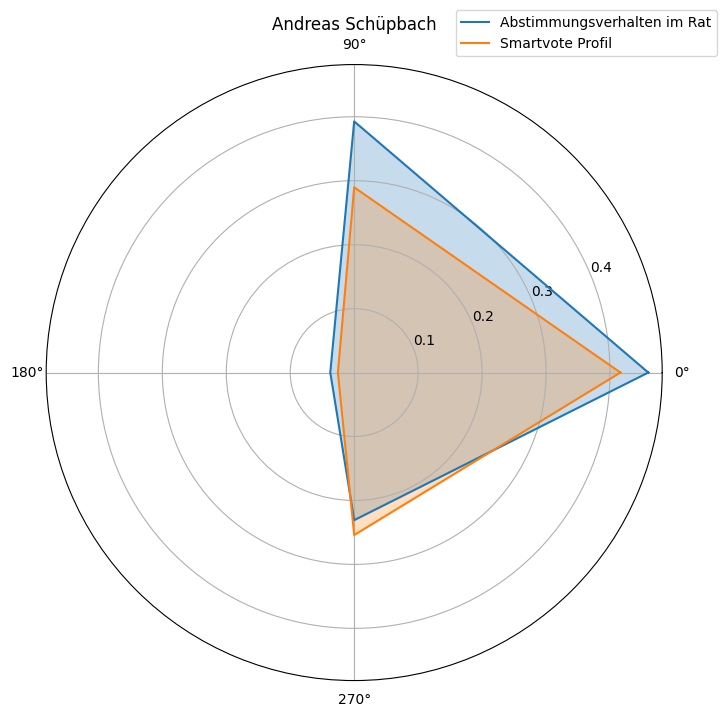

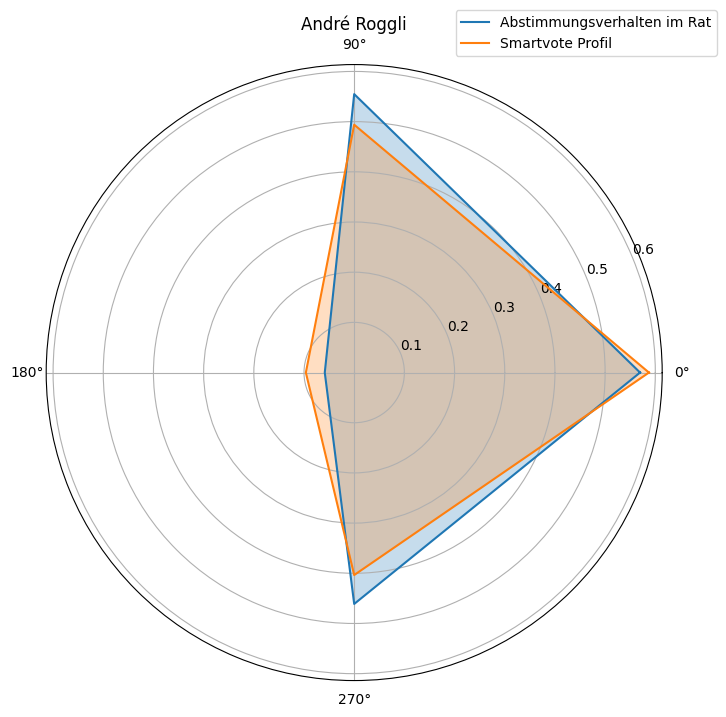

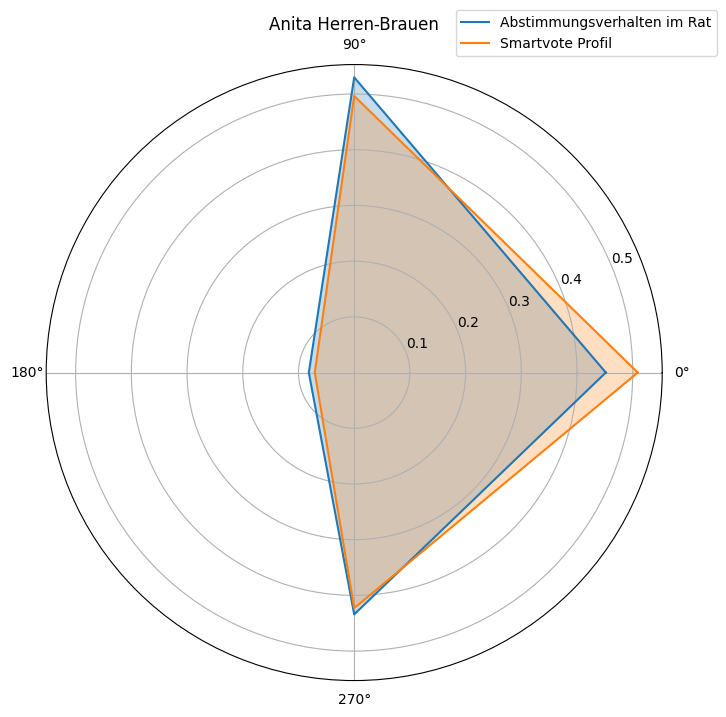

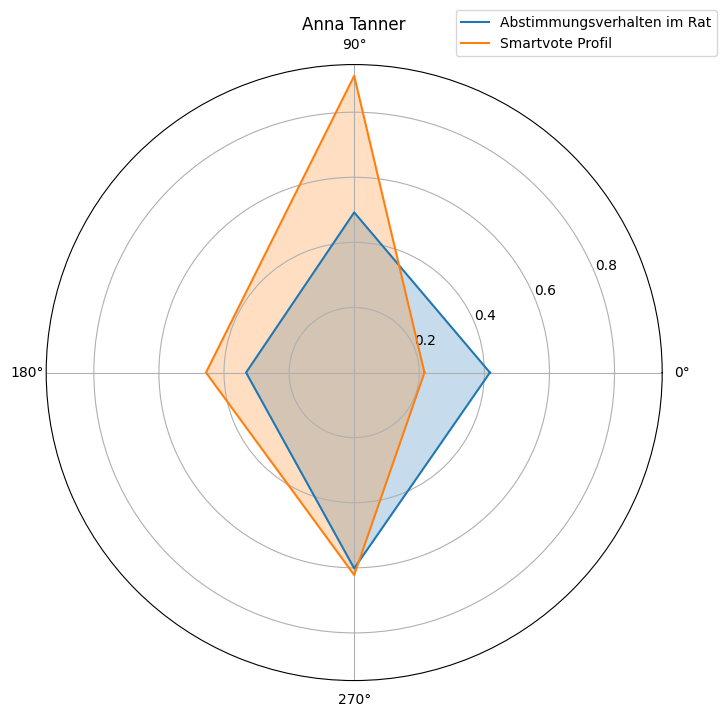

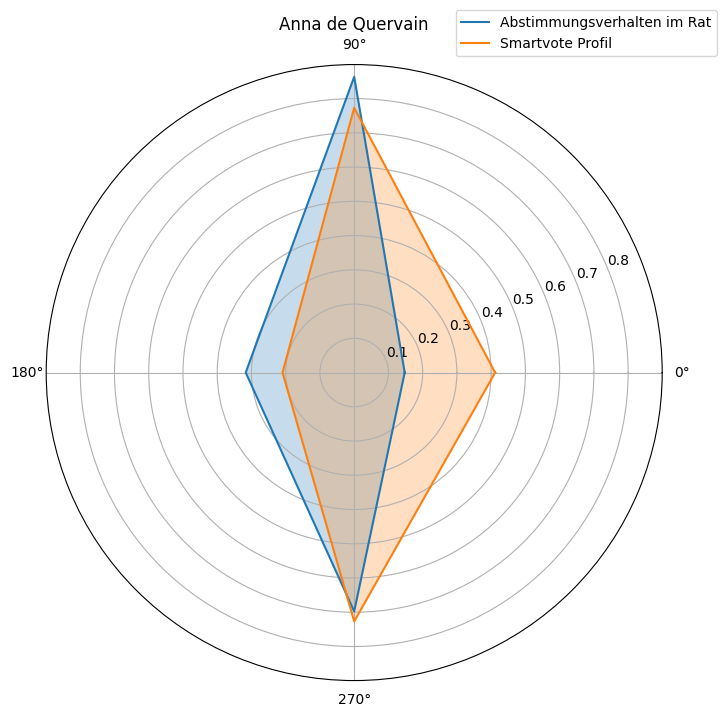

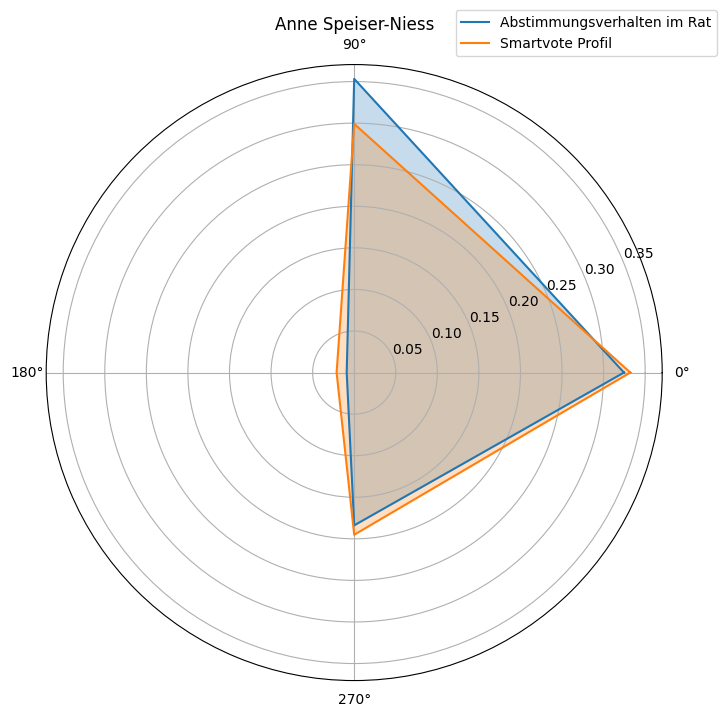

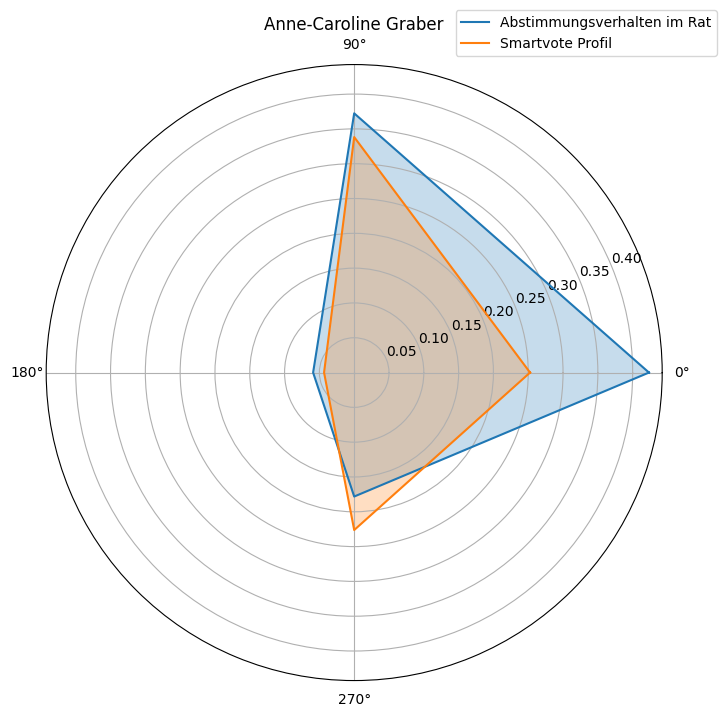

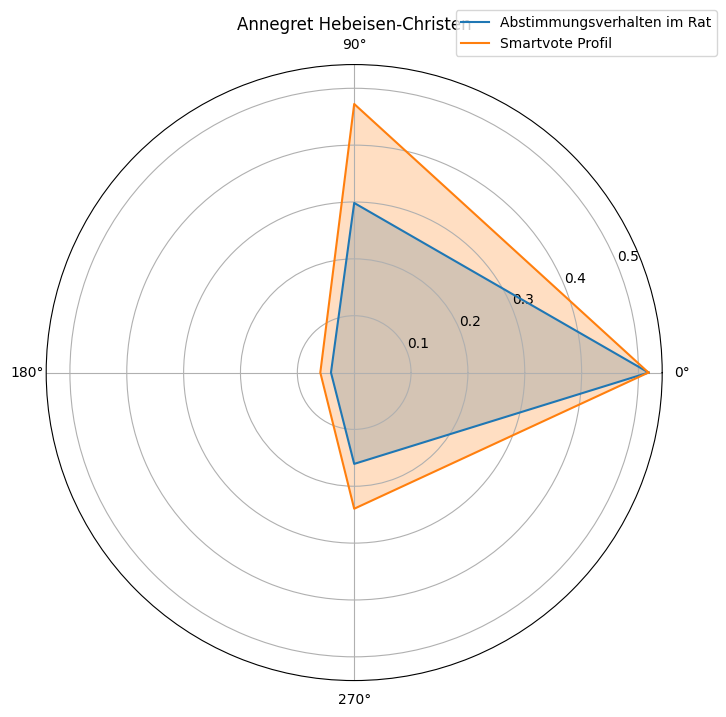

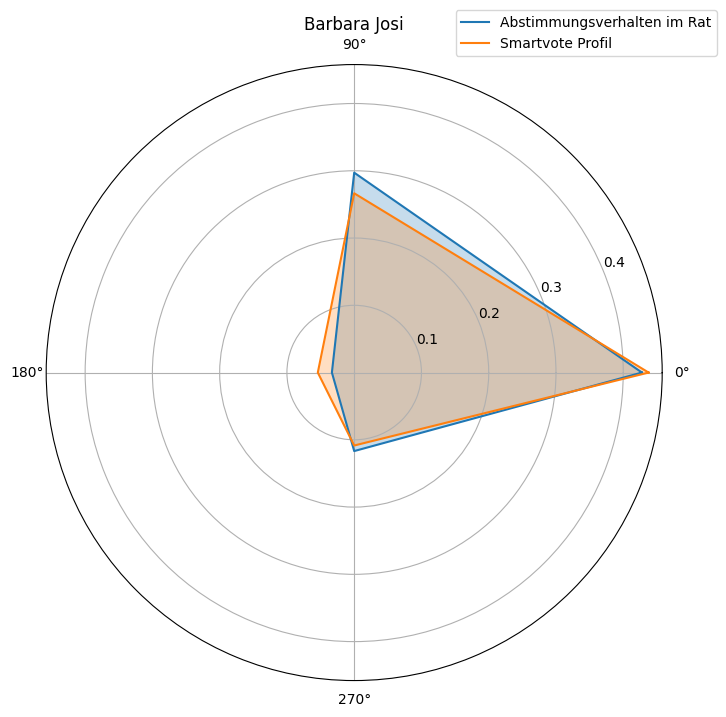

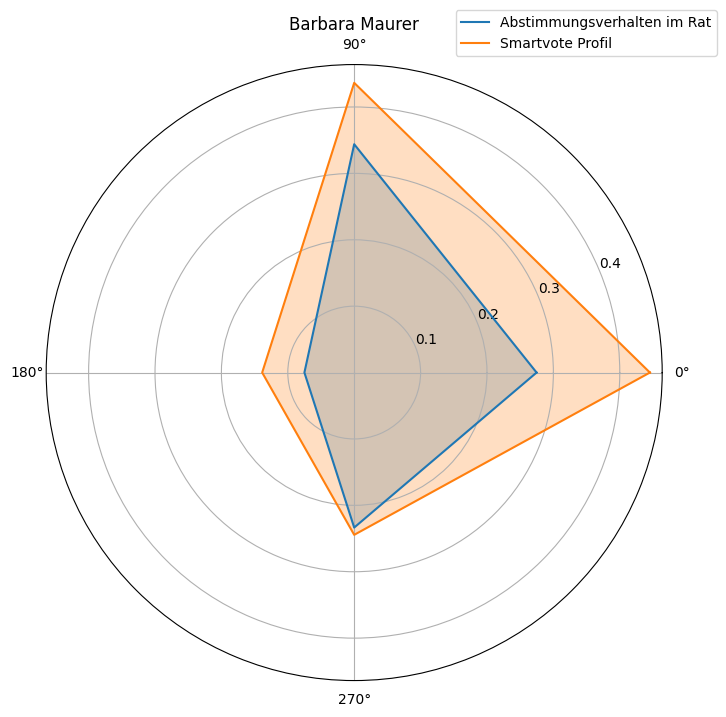

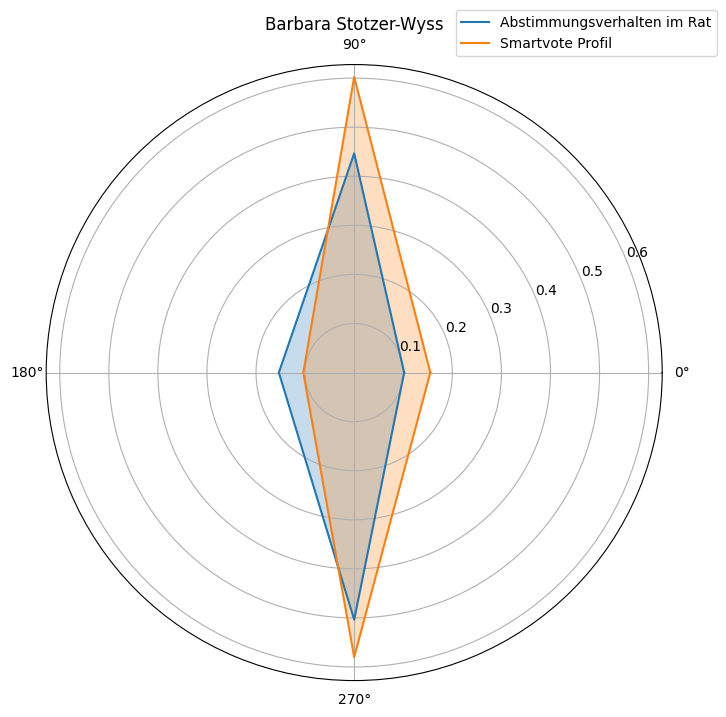

In [24]:
import matplotlib.pyplot as plt
import numpy as np

def plot_two_spider_charts(data1, data2, title):
    num_vars1 = len(data1)
    angles1 = np.linspace(0, 2 * np.pi, num_vars1, endpoint=False).tolist()
    angles1 += angles1[:1]
    data1 += data1[:1]

    num_vars2 = len(data2)
    angles2 = np.linspace(0, 2 * np.pi, num_vars2, endpoint=False).tolist()
    angles2 += angles2[:1]
    data2 += data2[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Plot Datenreihe 1
    ax.plot(angles1, data1, label='Abstimmungsverhalten im Rat')
    ax.fill(angles1, data1, alpha=0.25)

    # Plot Datenreihe 2
    ax.plot(angles2, data2, label='Smartvote Profil')
    ax.fill(angles2, data2, alpha=0.25)

    # Achsenlabels setzen (erste Achse, zweite wird ignoriert, ist aber möglich mit erweitertem Setup)
    ax.set_xticks(angles1[:-1])

    ax.set_title(title)
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

    plt.show()


count = 0

# Iterate through each candidate and plot their spider chart
for _, row in df_votes.iterrows():
    candidate_smartvote = df_smartvote[df_smartvote['id'] == row['id']]
    if not candidate_smartvote.empty:
        plot_two_spider_charts(
            [row["0"], row["1"], row["2"], row["3"]],
            candidate_smartvote.iloc[0][["0", "1", "2", "3"]].tolist(),
            f"{row['first_name']} {row['last_name']}"
        )
    count += 1
    if count > 20:
        break